# Unidad 7, Parte II - Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow. Junio 2024.

## Clase 2: Métodos de Monte Carlo
Su nombre viene dado por el casino del mismo nombre en Mónaco conocida como 'la capital del azar' (nuevamente, gracias wikipedia).<br>
Es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas no muy amigables para resolver. Si bien data de los años 40, los métodos evolucionaron a partir de los avances en la computación.<br>
Para que se den una idea, esta herramienta se origina durante el desarrollo de la bomba atómica durante la segunda guerra mundial donde John Von Neumann y Stanislaw Ulam simulaban con números aleatorios problemas probabilísticos de la difusión de neutrones en material de fisión. <br>
<br>
#### Pero de qué se trata exactamente?
Habla de una serie de métodos que aproximan soluciones a problemas matemáticos del tipo estocástico  o determinista (el primero se puede analizar en terminos de probabilidad, ya que existe una secuencia de cambiante de eventos o parámetros que dan lugar al resultado, y el segundo refiere a eventos no ligados al azar).<br>
Una simulación Montecarlo crea un modelo de resultados posibles aprovechando una distribución de probabilidad. Calcula lo que pasaría para cada situación random y luego de una serie larga de iteraciones del experimento, analiza el resultado final en términos de probabilidad, dando así una idea general del fenómeno. A mayor cantidad de iteraciones, mejores resultados se obtienen.<br> 



## Consignas TP 6: números peudoaleatoreos, Monte Carlo.
2. Determine la integral $\int_0^4 x^{2} dx$.<br><br>
3. Calcule el valor de $\pi$<br><br>
4. Calcule la integral de la distribucion de la campana de Gauss. Al ser una función simétrica, se puede calcular la integral entre 0 e infinito.<br>
Tener en cuenta que el infinito no existe en computación. Limite bien el rectángulo dentro del cuál generará los números aleatorios.<br>
$\int_{-\infty}^{\infty}e^{-x^{2}}dx = \sqrt{\pi}$<br><br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

### Hagamos juntos el siguiente ejercicio del TP
3. Calcule el valor de $\pi$<br><br>

Para estimar este valor, recordemos el ejercicio $0$, donde les pedí hagan un gráfico de distribución. Ven que les devolvió un ploteo cuadrado también? bueno, vamos a utilizar esto para crear un círculo dentro de este cuadrado, y ver  a partir de la relación entre estas superficies y los puntos generados pseudoaleatoreamente como obtener el valor de $\pi$.



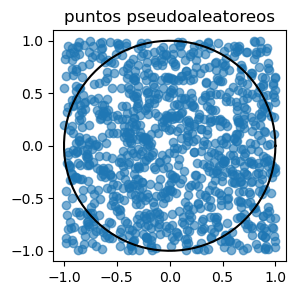

In [2]:
# todo este choclo es para graficar la idea de lo que digo, puntos que caen por dentro y fuera de la circunferencia
n = 1000
inicio = -1
fin = 1
r=1

random_list = np.random.random(n) * (fin - inicio) + inicio
random_list2 = np.random.random(n) * (fin - inicio) + inicio

theta = np.linspace( 0 , 2 * np.pi , 100 )
x = r * np.cos( theta )
y = r * np.sin( theta )
plt.figure(figsize=(3,3))
plt.plot( x, y , color = 'black')
plt.scatter(random_list,random_list2, alpha = 0.6)
plt.title('puntos pseudoaleatoreos')
plt.show()

Entonces, mirando la grafica sabemos que el área del cuadrado es  $l^{2}$, donde $l = 2r$.<br> 
Por otro lado, el área de la circunferencia es $\pi r^{2}$<br>
Dividiendo miembro a miembro, nos queda algo así como<br><br>
$\frac{Area_{cuadr}}{Area_{cir}} = \frac{(2r)^{2}}{\pi r^{2}}$<br><br>
Y despejando y cancelando algunas cosas entonces para obtener $\pi$<br><br>
$\pi = 4\frac{Area_{circ}r^{2}}{Area_{cuadr}r^{2}} = 4\frac{Area_{circ}}{Area_{cuadr}}$<br><br>
Que para nuestra simulacion, serán puntos aleatoreos que caigan dentro del area del cuadrado y dentro de la circunferencia, entonces<br><br>
$\pi = 4\frac{Puntos_{circ}}{Puntos_{cuadr}}$<br><br>
Por simplicidad, usaremos un circulo de radio 1.

minuto:18, segundos: 51
valor estimado de pi para 1000 iteraciones: 3.12


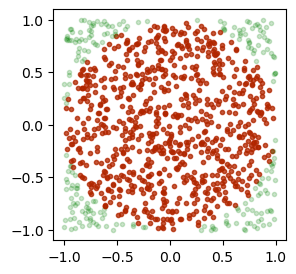

In [3]:
#inicializamos nuestra semilla
minutos = dt.now().minute
segundos = dt.now().second
np.random.seed(minutos+segundos)

n = 1000 #cantidad de puntos
r = 1 #radio de la circunferencia
fin = r #limite max valor numero pseudoaleatorio
inicio = -r #limite min valor numero pseudoaleatorio
cuadrado = 0 #contador
circulo = 0 #contador
 
plt.figure(figsize=(3,3))

for i in range(n):
    # como estoy trabajando con dos dimensiones, voy a generar valores random para 'x' e 'y' entre r y -r
    rand_x = np.random.rand() * (fin - inicio) + (inicio) 
    rand_y = np.random.rand() * (fin - inicio) + (inicio)  
 
    # para ver que caiga dentro del circulo de radio r
    distancia_centro = np.sqrt(rand_x**2 + rand_y**2)

    if distancia_centro <= r:
        circulo += 1
        plt.plot(rand_x,rand_y,'.r',alpha = 0.7)
    cuadrado += 1
    plt.plot(rand_x,rand_y,'.g',alpha = 0.2)

pi = 4 * circulo / cuadrado
print(f'valor estimado de pi para {n} iteraciones: {pi}')
plt.show()